In [1]:
# Importing relevant libraries
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk# this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
import seaborn as sns
%matplotlib inline
#nltk.download('stopwords') # list of stopwords - Stopwords are grammatically relevant which do not provide any data/statistical insight
#nltk.download('punkt') # List of punctuation marks 


In [87]:

import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Error loading inaugural: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [7]:
stopwords = nltk.corpus.stopwords.words('english') # languages dependent on latin script
punctuation = list(string.punctuation)
stop_punc = stopwords+punctuation

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
len(inaugural.fileids())

59

In [11]:
len(inaugural.words())

152901

In [12]:
len(inaugural.raw())

807276

In [16]:
len(inaugural.sents()) #no of sentences

5217

In [17]:
len([char for sentence in inaugural.sents() for word in sentence for char in word]) #no of characters

667512

In [19]:
len([word for sentence in inaugural.sents() for word in sentence])

152901

In [21]:
stopwords[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [22]:
stop_punc

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
nltk.FreqDist(inaugural.words()).most_common(10)

[('the', 9555),
 (',', 7275),
 ('of', 7169),
 ('and', 5226),
 ('.', 5011),
 ('to', 4477),
 ('in', 2604),
 ('a', 2229),
 ('our', 2062),
 ('that', 1769)]

In [52]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words()) 
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common()]

In [53]:
word_features[0:15]

['government',
 'people',
 'us',
 'must',
 'upon',
 '--',
 'great',
 'world',
 'may',
 'states',
 'nation',
 'country',
 'shall',
 'every',
 'one']

In [55]:
len(word_features)

9158

In [56]:
word_features

['government',
 'people',
 'us',
 'must',
 'upon',
 '--',
 'great',
 'world',
 'may',
 'states',
 'nation',
 'country',
 'shall',
 'every',
 'one',
 'peace',
 'new',
 'citizens',
 'power',
 'america',
 'public',
 'time',
 'would',
 'constitution',
 'united',
 'nations',
 'union',
 'freedom',
 'war',
 'free',
 'american',
 'let',
 'fellow',
 'national',
 'made',
 'good',
 'men',
 'make',
 'years',
 'well',
 'justice',
 'life',
 'without',
 'spirit',
 'rights',
 'never',
 'law',
 'congress',
 'laws',
 'work',
 'liberty',
 'right',
 'best',
 'duty',
 'hope',
 'interests',
 'know',
 'god',
 'today',
 'much',
 'many',
 'state',
 'among',
 'political',
 'history',
 'foreign',
 'long',
 'first',
 'man',
 'powers',
 'day',
 'future',
 'executive',
 'policy',
 'president',
 'principles',
 'progress',
 'part',
 'human',
 'within',
 'whole',
 'ever',
 'common',
 'duties',
 'support',
 'administration',
 'faith',
 'system',
 'far',
 'together',
 'confidence',
 'service',
 'purpose',
 'present',
 '

'mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook'

In [64]:
## We are defining a function to appropriately process the text document

def document_features(document): # we are naming the function as document_features
    document_words = set(document) #getting the unique number of entries in the document variable
    features = {} #defining an empty dictionary
    for word in word_features: #looping over the 'word_features' which has been defined in the last code block
        features['contains({})'.format(word)] = (word in document_words) #defining 'features' in  particular format
        # and checking whether the unique elements of the input 'document' are contained in the 'word_features' 
        # defined before
    return features

In [68]:
import re
import nltk 
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [69]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [70]:
inaugural_speech


,president,text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [71]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,president,text,word_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


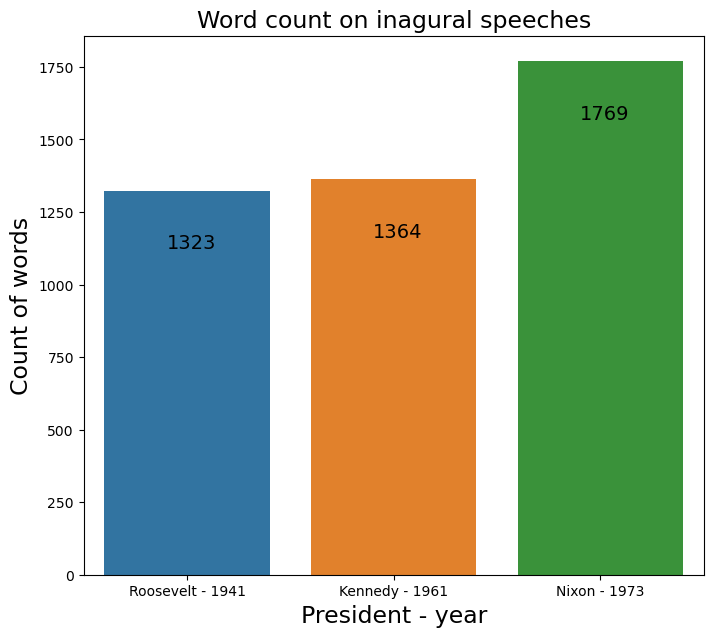

In [72]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='word_count', x='president', data=inaugural_speech)
plt.title('Word count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of words',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 14)

In [73]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech

,president,text,word_count,char_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991


In [74]:
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,president,text,word_count,char_count,sents_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68


In [75]:
# Lower case conversion
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [76]:
# Remove punctuation
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

C:\Users\skyha\AppData\Local\Temp\ipykernel_50376\2114310936.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')


1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [77]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [78]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech

,president,text,word_count,char_count,sents_count
1941-Roosevelt,Roosevelt - 1941,national day inauguration since 1789 people re...,1323,7571,68
1961-Kennedy,Kennedy - 1961,vice president johnson speaker chief justice p...,1364,7618,52
1973-Nixon,Nixon - 1973,vice president speaker chief justice senator c...,1769,9991,68


In [79]:
print("Speech of president Roosevelt without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

Speech of president Roosevelt without stopwords


['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [108]:
print("Speech of president Roosevelt without stopwords")

Speech of president Roosevelt without stopwords


In [115]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:5]
freq

nation       11
know         10
spirit        9
democracy     9
life          8
dtype: int64

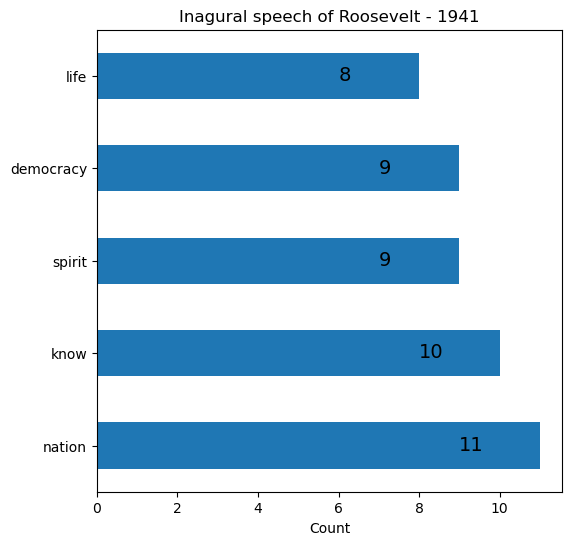

In [117]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [120]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:5]
freq

world     8
sides     8
new       7
pledge    7
power     5
dtype: int64

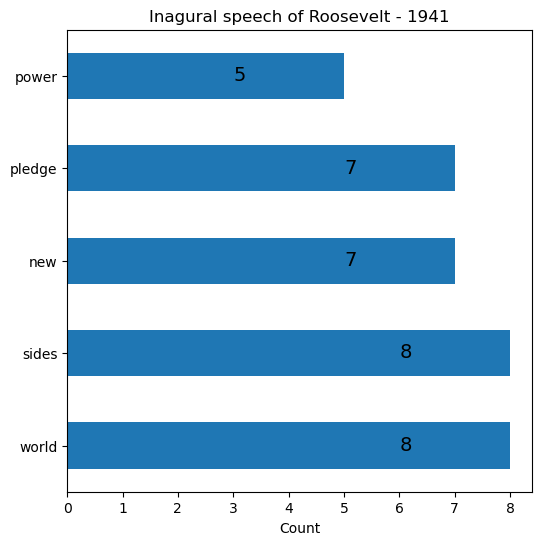

In [121]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [122]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:5]
freq

peace             19
world             16
new               15
america           13
responsibility    11
dtype: int64

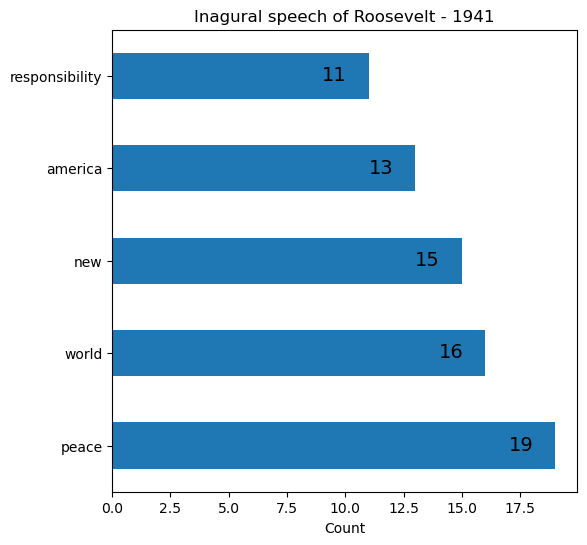

In [123]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [89]:
import sys
print(sys.executable)

C:\Users\skyha\anaconda3\python.exe


In [92]:
!<path-to-the-executable>/python -m pip install wordcloud

The system cannot find the file specified.


In [93]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Word Cloud for Roosewelt after cleaning


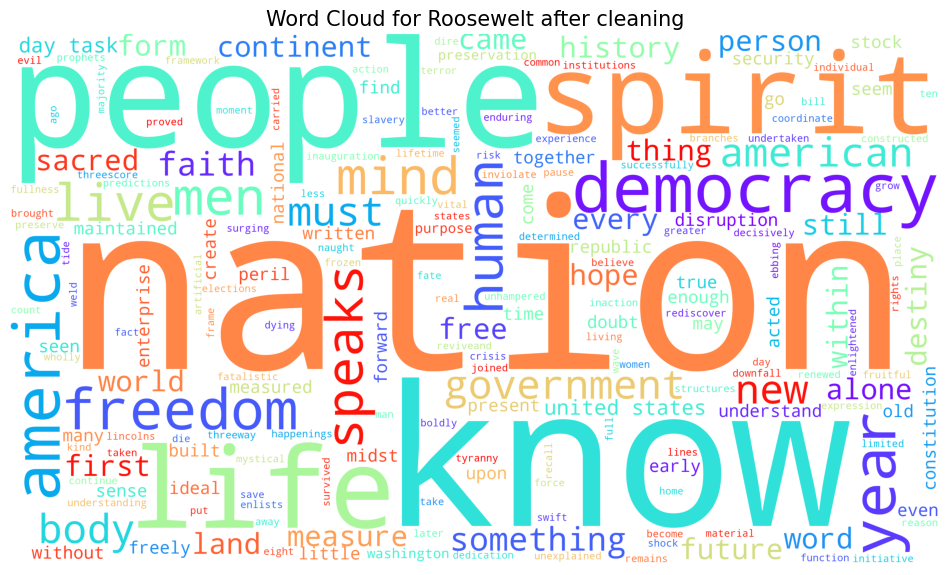

In [99]:
from wordcloud import WordCloud,STOPWORDS
#new_df=inaugural_speech.iloc[0:1,0]
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Roosewelt after cleaning",fontsize=15)
print("Word Cloud for Roosewelt after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Kennedy after cleaning


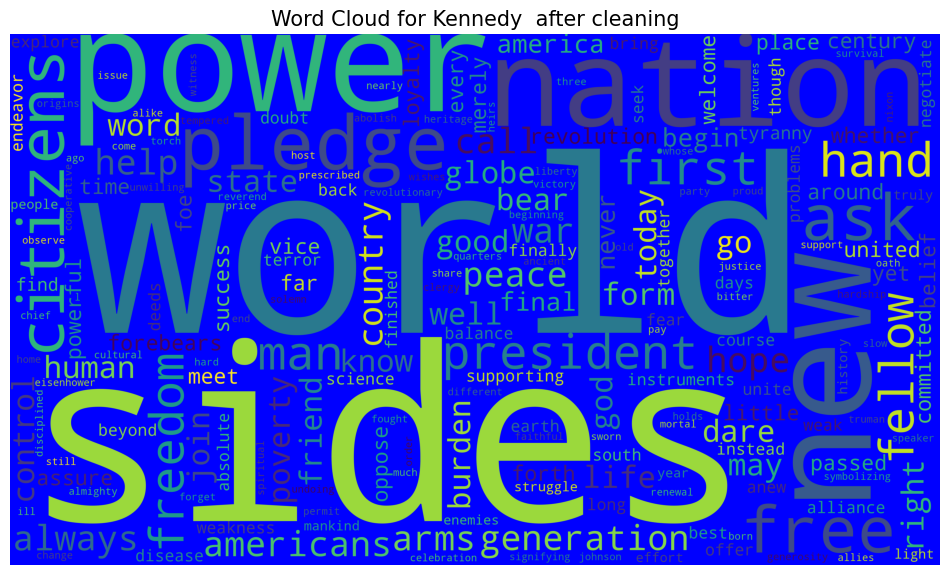

In [100]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='blue',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Kennedy  after cleaning",fontsize=15)
print("Word Cloud for Kennedy after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Nixon after cleaning


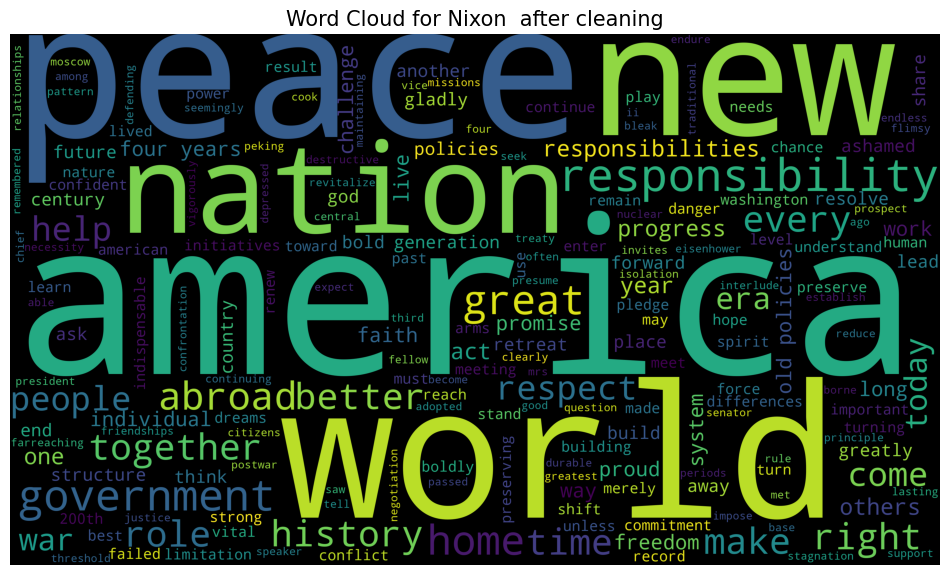

In [101]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',

                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Nixon  after cleaning",fontsize=15)
print("Word Cloud for Nixon after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()